In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import sklearn

In [2]:
df = pd.read_csv('water.csv')
df = df.set_index(df.columns[0])
df.head()

,location,town,mortality,hardness
Unnamed: 0,,,,
1,South,Bath,1247,105
2,North,Birkenhead,1668,17
3,South,Birmingham,1466,5
4,North,Blackburn,1800,14
5,North,Blackpool,1609,18


In [3]:
df.describe()

,mortality,hardness
count,61.000000,61.000000
mean,1524.147541,47.180328
std,187.668754,38.093966
min,1096.000000,5.000000
25%,1379.000000,14.000000
50%,1555.000000,39.000000
75%,1668.000000,75.000000
max,1987.000000,138.000000


## 1 Задача - ответить на вопрос есть ли связь между жёсткостью воды и средней годовой смертностью?

Построить точечный график
Рассчитать коэффициенты корреляции Пирсона и Спирмена
Построить модель линейной регрессии
Рассчитать коэффициент детерминации
Вывести график остатков
## 2 Задание.
Сохраняется ли аналогичная зависимость для северных и южных городов по отдельности?

Разделить данные на 2 группы
Повторить аналогичные шаги из пункта 1 для каждой группы по отдельности

In [4]:
south = df[df['location'] == 'South']
north = df[df['location'] == 'North']
print(south.shape, north.shape)

(26, 4) (35, 4)


<AxesSubplot:xlabel='hardness', ylabel='mortality'>

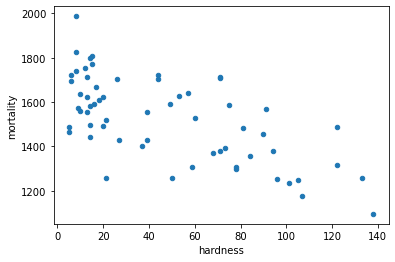

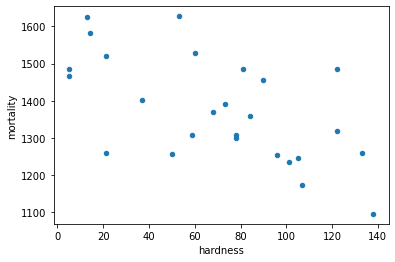

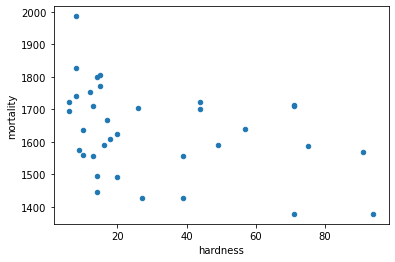

In [5]:
df.plot(kind = 'scatter', x = 'hardness', y = 'mortality', legend = True)
south.plot(kind = 'scatter', x = 'hardness', y = 'mortality')
north.plot(kind = 'scatter', x = 'hardness', y = 'mortality')

In [6]:
print(df[['hardness', 'mortality']].corr())
print('-'*30)
print(df[['hardness', 'mortality']].corr(method = 'spearman'))
print('-'*30)
print(df[['hardness', 'mortality']].corr(method = 'kendall'))

           hardness  mortality
hardness   1.000000  -0.654849
mortality -0.654849   1.000000
------------------------------
           hardness  mortality
hardness   1.000000  -0.631665
mortality -0.631665   1.000000
------------------------------
           hardness  mortality
hardness   1.000000  -0.453753
mortality -0.453753   1.000000


In [7]:
print(south[['hardness', 'mortality']].corr())
print('-'*30)
print(south[['hardness', 'mortality']].corr(method = 'spearman'))
print('-'*30)
print(south[['hardness', 'mortality']].corr(method = 'kendall'))

           hardness  mortality
hardness   1.000000  -0.602153
mortality -0.602153   1.000000
------------------------------
           hardness  mortality
hardness   1.000000  -0.595723
mortality -0.595723   1.000000
------------------------------
           hardness  mortality
hardness   1.000000  -0.440315
mortality -0.440315   1.000000


In [8]:
print(north[['hardness', 'mortality']].corr())
print('-'*30)
print(north[['hardness', 'mortality']].corr(method = 'spearman'))
print('-'*30)
print(north[['hardness', 'mortality']].corr(method = 'kendall'))

           hardness  mortality
hardness   1.000000  -0.368598
mortality -0.368598   1.000000
------------------------------
           hardness  mortality
hardness   1.000000  -0.404208
mortality -0.404208   1.000000
------------------------------
           hardness  mortality
hardness   1.000000  -0.283058
mortality -0.283058   1.000000


In [11]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

In [20]:
X = df[['hardness']]
y = df['mortality']

In [21]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)

In [22]:
X_train.shape

(42, 1)

In [23]:
y_train.shape

(42,)

In [24]:
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [25]:
model.coef_

array([-3.13167087])

In [26]:
model.intercept_

1668.9722977277095

In [27]:
y_pred = model.predict(X_test)
y_pred

array([1340.14685615, 1637.65558901, 1625.12890552, 1531.17877935,
       1424.7019697 , 1606.33888028, 1252.46007173, 1434.09698232,
       1603.20720941, 1650.18227249, 1484.20371627, 1415.30695708,
       1546.83713371, 1625.12890552, 1446.62366581, 1546.83713371,
       1637.65558901, 1621.99723465, 1352.67353964])

In [29]:
model.score(X_test, y_test)

0.5046490611017092

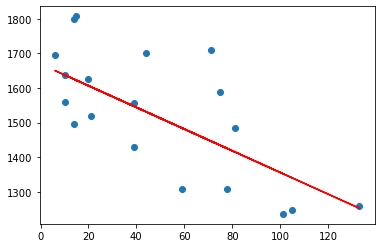

In [31]:
plt.scatter(X_test, y_test)
plt.plot(X_test, y_pred, c='r')

In [33]:
import statsmodels.api as sm
from statsmodels.sandbox.regression.predstd import wls_prediction_std

In [35]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)

In [36]:
X_const = sm.add_constant(X_train)

In [39]:
X_const.shape

(42, 2)

In [40]:
model = sm.OLS(y_train, X_const)
results = model.fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:              mortality   R-squared:                       0.397
Model:                            OLS   Adj. R-squared:                  0.382
Method:                 Least Squares   F-statistic:                     26.31
Date:                Wed, 30 Dec 2020   Prob (F-statistic):           7.83e-06
Time:                        20:57:47   Log-Likelihood:                -269.10
No. Observations:                  42   AIC:                             542.2
Df Residuals:                      40   BIC:                             545.7
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       1668.9723     36.543     45.671      0.0

(array([2., 6., 8., 9., 9., 6., 2.]),
 array([-343.20720941, -245.16602675, -147.12484408,  -49.08366141,
          48.95752125,  146.99870392,  245.03988658,  343.08106925]),
 <BarContainer object of 7 artists>)

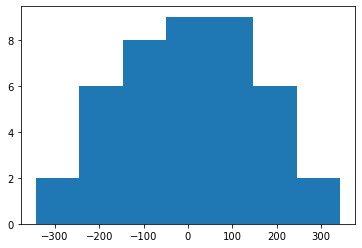

In [50]:
plt.hist(results.resid, bins = 7)

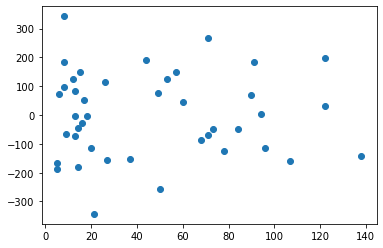

In [45]:
plt.scatter(X_const.iloc[:, 1], results.resid)

## Исследуем южан

In [52]:
X = south[['hardness']]
y = south['mortality']

In [53]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)

In [54]:
X_train.shape

(18, 1)

In [55]:
y_train.shape

(18,)

In [56]:
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [57]:
model.coef_

array([-3.51342921])

In [58]:
model.intercept_

1640.2204603423374

In [59]:
y_pred = model.predict(X_test)
y_pred

array([1211.58209643, 1622.65331428, 1271.31039304, 1211.58209643,
       1510.22357948, 1566.43844688, 1432.92813681, 1622.65331428])

In [60]:
model.score(X_test, y_test)

-2.5519223012352077

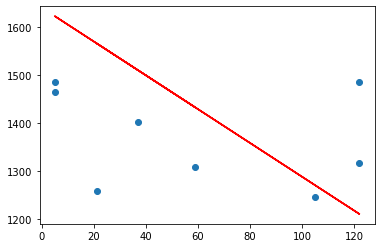

In [61]:
plt.scatter(X_test, y_test)
plt.plot(X_test, y_pred, c='r')

In [62]:
import statsmodels.api as sm
from statsmodels.sandbox.regression.predstd import wls_prediction_std

In [63]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)

In [64]:
X_const = sm.add_constant(X_train)

In [65]:
X_const.shape

(18, 2)

In [66]:
model = sm.OLS(y_train, X_const)
results = model.fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:              mortality   R-squared:                       0.636
Model:                            OLS   Adj. R-squared:                  0.614
Method:                 Least Squares   F-statistic:                     28.00
Date:                Wed, 30 Dec 2020   Prob (F-statistic):           7.30e-05
Time:                        21:05:43   Log-Likelihood:                -106.97
No. Observations:                  18   AIC:                             217.9
Df Residuals:                      16   BIC:                             219.7
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       1640.2205     54.471     30.112      0.0

C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\stats.py:1603: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=18
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


(array([1., 0., 7., 3., 2., 2., 3.]),
 array([-207.54899972, -153.18610149,  -98.82320326,  -44.46030502,
           9.90259321,   64.26549145,  118.62838968,  172.99128791]),
 <BarContainer object of 7 artists>)

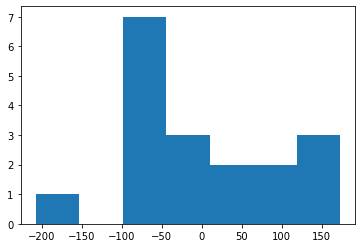

In [67]:
plt.hist(results.resid, bins = 7)

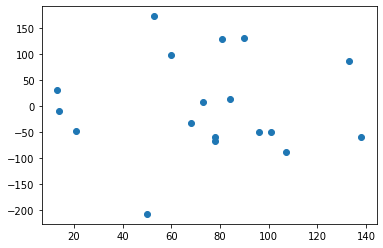

In [68]:
plt.scatter(X_const.iloc[:, 1], results.resid)

## Вывод: не смотря на сравнительно высокий коэффициент корреляции, имеющиеся данные не позволяют увидеть каких-то закономерностей и, тем более, делать прогнозы

## А теперь северяне

In [69]:
X = north[['hardness']]
y = north['mortality']

In [70]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)

In [71]:
X_train.shape

(24, 1)

In [72]:
y_train.shape

(24,)

In [73]:
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [74]:
model.coef_

array([-1.97686226])

In [75]:
model.intercept_

1688.150229031281

In [76]:
y_pred = model.predict(X_test)
y_pred

array([1672.33533095, 1670.35846869, 1660.47415739, 1676.28905547,
       1656.52043287, 1547.79300857, 1601.16828959, 1672.33533095,
       1611.05260089, 1658.49729513, 1611.05260089])

In [77]:
model.score(X_test, y_test)

0.018885304285745863

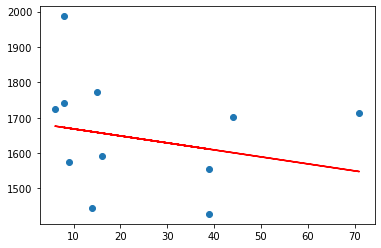

In [78]:
plt.scatter(X_test, y_test)
plt.plot(X_test, y_pred, c='r')

In [79]:
import statsmodels.api as sm
from statsmodels.sandbox.regression.predstd import wls_prediction_std

In [80]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)

In [81]:
X_const = sm.add_constant(X_train)

In [82]:
X_const.shape

(24, 2)

In [83]:
model = sm.OLS(y_train, X_const)
results = model.fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:              mortality   R-squared:                       0.193
Model:                            OLS   Adj. R-squared:                  0.157
Method:                 Least Squares   F-statistic:                     5.269
Date:                Wed, 30 Dec 2020   Prob (F-statistic):             0.0316
Time:                        21:08:02   Log-Likelihood:                -147.20
No. Observations:                  24   AIC:                             298.4
Df Residuals:                      22   BIC:                             300.7
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       1688.1502     37.137     45.457      0.0

(array([4., 3., 0., 4., 4., 4., 5.]),
 array([-207.77494801, -155.06324237, -102.35153674,  -49.63983111,
           3.07187453,   55.78358016,  108.4952858 ,  161.20699143]),
 <BarContainer object of 7 artists>)

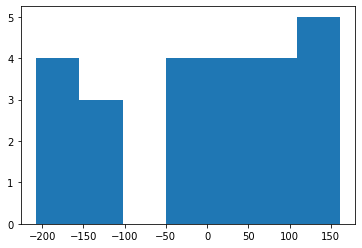

In [84]:
plt.hist(results.resid, bins = 7)

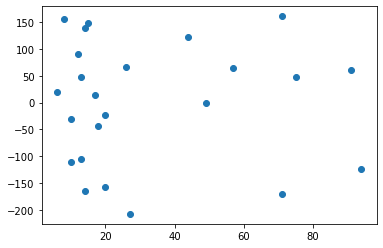

In [85]:
plt.scatter(X_const.iloc[:, 1], results.resid)

## Вывод: у северян изначально был низкий коэффициент корреляции, что закономерно не позволяет делать адекватных прогнозов 

## Общий вывод: связь смертности с жесткостью воды если и существует (вполне вероятно), то поиск закономерностей должен вестись на дистанции а не в одной точке. При таких данных, как у нас, закономерность может быть только ложной, а контрольные величины могу гулять в широких пределах из-за огромного количества других факторов, таких, например, как климат или сезонные эпидемии.